# Задание 3. Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [413]:
import numpy as np
import matplotlib.pyplot as plt
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [414]:
print("Training data exapmle: \n", X[:3])
print("Training data shape: \n", X.shape)
print("Training data exapmle: \n", Y[:5])

Training data exapmle: 
 [[  9.31  -17.043  20.807  11.109]
 [ -6.446 -12.46  -12.941 -14.715]
 [ 14.324  -9.624  29.533   1.439]]
Training data shape: 
 (1000, 4)
Training data exapmle: 
 [-165.864  -49.048 -161.183  177.828   40.092]


#### 1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации  𝛼 , используя полные данные для обучения и для тестирования.

In [415]:
### Функиця, возвращающая приближения к целевым значениям
### Если X_ = X, то аппроксимируются обучающие данные
def approxFunc(X, Y, alp, X_):
    
    # Параметры
    theta = np.linalg.inv(X.T @ X + alp * np.identity(X.shape[1])) @ X.T @ Y
    # Приближения
    approx_Y = theta @ X_.T
    
    return approx_Y

In [416]:
### Среднеквадратичная ошибка
def MSE(Y, Y_):
    return ((Y - Y_)**2 ).mean()

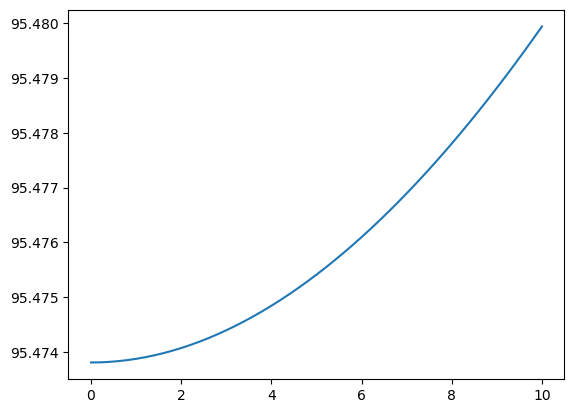

In [417]:
alphs = np.linspace(0, 10, 51)

MSEs = [ MSE(Y, approxFunc(X, Y, a, X) ) for a in alphs ]

plt.plot(alphs, MSEs)

#### 2. Подготовьте исходные данные для 5 fold CV.

In [418]:
### Кросс-валидация
def CV(X, Y, k_fold = 5, Trace=False):
    
    # Индексы разбивания
    inds = np.intc( np.linspace(0, X.shape[0], k_fold + 1) )
    
    # Вернуть генератор выборок
    for i in range( len(inds) - 1 ):
        
        if (Trace):
            print(f"Validation indices: {inds[i]} - {inds[i+1]}.")
        
        X_train = np.vstack([ X[:inds[i]], X[inds[i+1]:] ])
        X_val = X[inds[i]:inds[i+1]]
        Y_train = np.hstack([ Y[:inds[i]], Y[inds[i+1]:] ])
        Y_val = Y[inds[i]:inds[i+1]]
        
        yield X_train, Y_train, X_val, Y_val

In [419]:
I = CV(X, Y, 5, Trace=True)

In [420]:
for res in CV(X, Y, 5):
    print( res[0].shape, res[1].shape, res[2].shape, res[3].shape, '\n' )

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 



#### 3. С помощью CV найдите оптимальное значение  𝛼  на какой-нибудь сетке значений.
#### 4. Постройте валидационную кривую.

Optimal trian regularization value:  0.0
Optimal validation regularization value:  3.8000000000000003


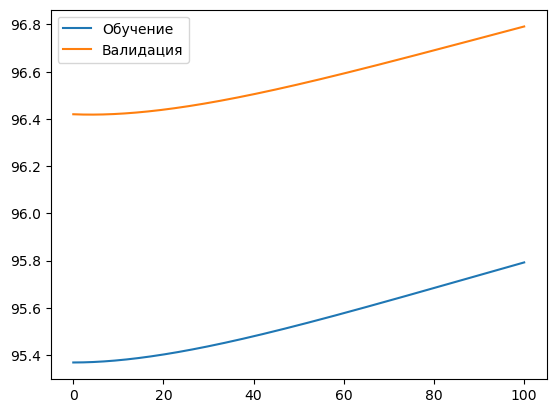

In [426]:
alphs = np.linspace(0, 100, 501)
MSEs_val = []
MSEs_train = []
k_fold = 5

for alph in alphs:
    mse_val = []
    mse_train = []
    
    for (X_train, Y_train, X_val, Y_val) in CV(X, Y, k_fold = k_fold):
        
        Y_train_ = approxFunc(X_train, Y_train, alph, X_ = X_train)
        Y_val_ = approxFunc(X_train, Y_train, alph, X_ = X_val)
        
        mse_train.append( MSE(Y_train, Y_train_) )
        mse_val.append( MSE(Y_val, Y_val_) )
        
        
    MSEs_train.append(sum(mse_train)/len(mse_train))
    MSEs_val.append(sum(mse_val)/len(mse_val))
    
    

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)

plt.plot(alphs, MSEs_train, label='Обучение')
plt.plot(alphs, MSEs_val, label = 'Валидация')

plt.legend()

print("Optimal trian regularization value: ", alphs[np.argmin(MSEs_train)])
print("Optimal validation regularization value: ", alphs[np.argmin(MSEs_val)])

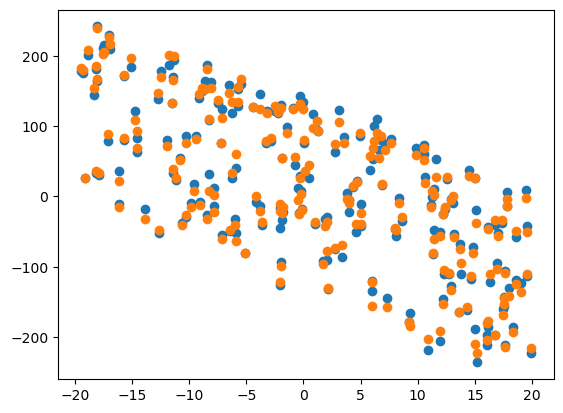

In [386]:
I = CV(X, Y, k_fold = k_fold)
X_train, Y_train, X_val, Y_val = next(I)
Y_ = approxFunc(X_train, Y_train, alp=3.8, X_=X_val)
plt.scatter(X_val[:, 0], Y_val)
plt.scatter(X_val[:, 0], Y_)

#### 5. Постройте кривую обучения.

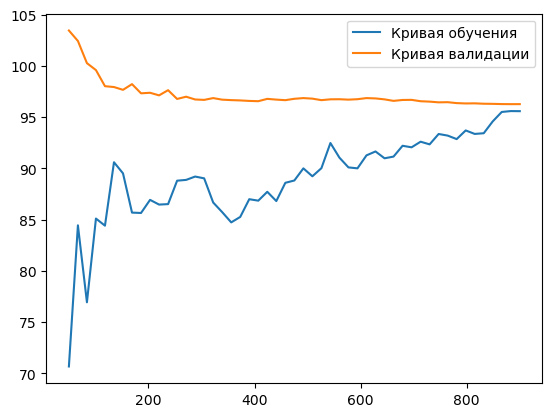

In [397]:
sizes = np.linspace(50, 900, 51)
X_val = X[100:]
Y_val = Y[100:]

MSEs_train = []
MSEs_val = []

alph = 3.8

for ind in sizes:
    
    X_train = X[:int(ind)]
    Y_train = Y[:int(ind)]
    
    Y_train_ = approxFunc(X_train, Y_train, alph, X_ = X_train)
    Y_val_ = approxFunc(X_train, Y_train, alph, X_ = X_val)
    
    MSEs_train.append( MSE(Y_train, Y_train_) )
    MSEs_val.append( MSE(Y_val, Y_val_)  )
    
plt.plot(sizes, MSEs_train, label = 'Обучение')
plt.plot(sizes, MSEs_val, label = 'Валидация')
plt.legend()

## Реализация градиентным спуском

#### 1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации  𝛼 , используя полные данные для обучения и для тестирования.

In [401]:
# Модель линейной регрессии
class LRmodel:
    
    # Конструктор. Инициализация параметров случайными числами
    def __init__(self, dim = 1):
        self.dim = dim
        self.thets = np.random.random(dim)
        
    # Возвращаем значения модели от X: F(X)
    def __call__(self, X):
        return X @ self.thets
    
    
    ### Среднеквадратичная ошибка (с возможностью регуляризации)
    def MSE(Y, Y_, with_reg=False, alp=0, thets = 0):
        if (with_reg):
            return ((Y - Y_)**2 ).mean() + alp * thets @ thets
        else:
            return ((Y - Y_)**2 ).mean()
    
    
    # Одномерная минимизация 
    def GoldSectSearch(func, a, b, eps = 10**(-6), maxIter = 1000):
        
        a, b = np.sort([a, b])
        assert b-a > eps, "Wrong eps or (a, b) values."
        
        # Постоянная золотого сечения 
        gold_ratio = (1 + np.sqrt(5) ) / 2
        
        # Цикл
        it = 0
        while (np.abs(b-a) > eps) and (it < maxIter):
            
            x_1 = b - ( (b - a) / gold_ratio )
            x_2 = a + ( (b - a) / gold_ratio )
            
            y_1 = func(x_1)
            y_2 = func(x_2)
            
            if (y_1 >= y_2):
                a = x_1
            else:
                b = x_2
                
            it += 1
    
        x = (b + a) / 2
        
        return x, func(x)
    
    
    # Вспомогательная функция для определения оптимального шага в сторону градиента
    def currentIterMSE(X, Y, thets, grad, lamb, alp ):
        return LRmodel.MSE( Y, X @ (thets - lamb*grad), True, alp, thets - lamb*grad )
    

    # Обучениe
    def fit(self, X, Y, alp = 0, X_val=[], Y_val=[], a=0, b=100, iterations = 1000):
        
        thets = self.thets
        MSEs = []
        it = []
        for i in range(iterations):
            
            if (len(X_val) != 0):
                it.append(i)
                MSEs.append( LRmodel.MSE( self(X_val), Y_val) )
                
            # Вычисление градиента
            grad = (X @ thets - Y).T @ X + alp * thets 
            
            
            optLamb = LRmodel.GoldSectSearch( lambda x: LRmodel.currentIterMSE(X, Y, thets, grad, x, alp),
                                              a = 0, b = 100)[0]
            
            thets -= optLamb * grad
            
            
        self.thets = thets     
        
        if (len(X_val) != 0):
            return it, MSEs
    
    
    def resParams(self):
        self.thets = np.random.random(self.dim)

In [402]:
testModel = LRmodel(4)

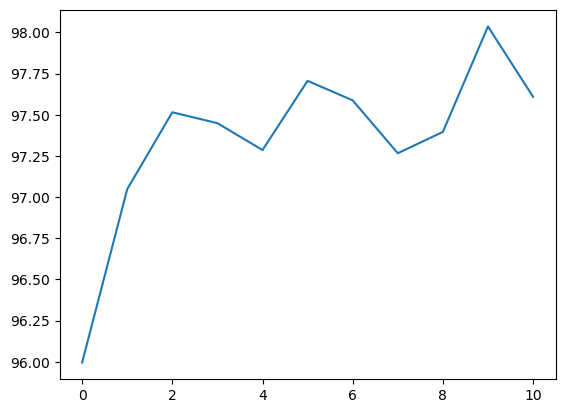

In [403]:
alphs = np.linspace(0, 10, 11)
MSEs = []

for a in alphs:
    testModel.fit(X, Y, a)
    MSEs.append( LRmodel.MSE( Y, testModel(X) ) )
    testModel.resParams()

plt.plot(alphs, MSEs)

#### 2. Подготовьте исходные данные для 5 fold CV.

In [405]:
### Кросс валидация
def CV(X, Y, k_fold = 5, Trace=False):
    
    # Индексы разбивания
    inds = np.intc( np.linspace(0, X.shape[0], k_fold + 1) )
    
    # Вернуть генератор выборок
    for i in range( len(inds) - 1 ):
        
        if (Trace):
            print(f"Validation indices: {inds[i]} - {inds[i+1]}.")
        
        X_train = np.vstack([ X[:inds[i]], X[inds[i+1]:] ])
        X_val = X[inds[i]:inds[i+1]]
        Y_train = np.hstack([ Y[:inds[i]], Y[inds[i+1]:] ])
        Y_val = Y[inds[i]:inds[i+1]]
        
        yield X_train, Y_train, X_val, Y_val

In [406]:
I = CV(X, Y, 5, Trace=True)

In [407]:
for res in CV(X, Y, 5):
    print( res[0].shape, res[1].shape, res[2].shape, res[3].shape, '\n' )

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 

(800, 4) (800,) (200, 4) (200,) 



#### 3. С помощью CV найдите оптимальное значение 𝛼 на какой-нибудь сетке значений.
#### 4. Постройте валидационную кривую.

Optimal validation regularization value:  1.9


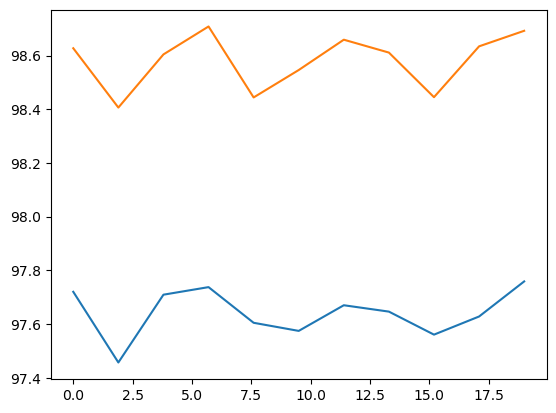

In [432]:
alphs = np.linspace(0, 19, 11)
MSEs_train = []
MSEs_val = []
k_fold = 5


for alph in alphs:
    
    mse_train = []
    mse_val = []
    
    testModel.resParams()
    
    for (X_train, Y_train, X_val, Y_val) in CV(X, Y, k_fold = k_fold):
        
        testModel.fit(X_train, Y_train, a)
        mse_train.append( LRmodel.MSE( Y_train, testModel(X_train) ) )
        mse_val.append( LRmodel.MSE( Y_val, testModel(X_val) ) )
        testModel.resParams()
        
    MSEs_train.append( sum(mse_train)/ len(mse_train) )
    MSEs_val.append( sum(mse_val)/ len(mse_val) )
    
plt.plot(alphs, MSEs_train, label = 'Обучение')
plt.plot(alphs, MSEs_val, label = 'Валидация')

plt.legend()

print("Optimal validation regularization value: ", alphs[np.argmin(MSEs_val)])

#### 5. Постройте кривую обучения.

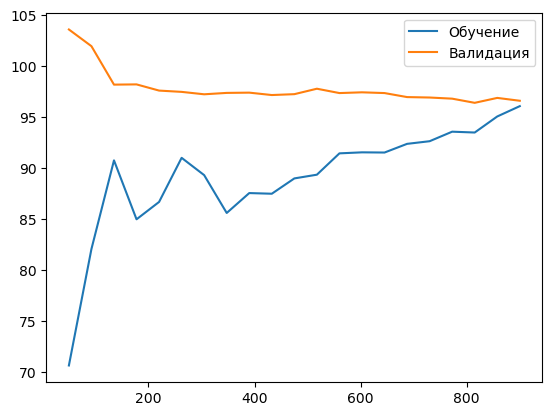

In [433]:
sizes = np.linspace(50, 900, 21)
X_val = X[100:]
Y_val = Y[100:]

testModel = LRmodel(4)

MSEs_train = []
MSEs_val = []

alph = 1.9

for ind in sizes:
    
    X_train = X[:int(ind)]
    Y_train = Y[:int(ind)]
    
    testModel.fit(X_train, Y_train)
    
    Y_train_ = testModel(X_train)
    Y_val_ = testModel(X_val)
    
    MSEs_train.append( LRmodel.MSE(Y_train, Y_train_) )
    MSEs_val.append( LRmodel.MSE(Y_val, Y_val_)  )
    
    testModel.resParams()
    
plt.plot(sizes, MSEs_train, label = 'Обучение')
plt.plot(sizes, MSEs_val, label = 'Валидация')
plt.legend()